# Match kernel
Notebook by Laetitia Chapel and Romain Tavenard

## Reference

This refers to the following paper by Bo & Sminchisescu:
> Bo, L., & Sminchisescu, C. (2009). 
> Efficient match kernel between sets of features for visual recognition. 
> In Advances in neural information processing systems (pp. 135-143).

## Problem statement

The idea here is to define a kernel $K$ between sets of features that relies on a local kernel $k$ that operates at the feature level:

$$K(\mathcal{X}, \mathcal{Y}) = \frac{\sum_{x \in \mathcal{X}} \sum_{y \in \mathcal{Y}} k(x, y)}{\text{card}(\mathcal{X}) \cdot \text{card}(\mathcal{Y})}.$$



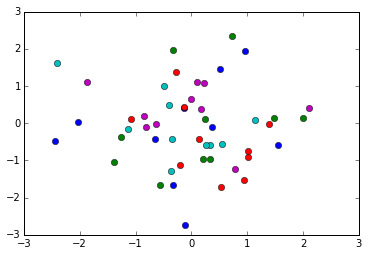

In [1]:
%matplotlib inline
import numpy
import pylab
from sklearn.metrics.pairwise import rbf_kernel


def match_kernel(set1, set2, gamma):
    return numpy.sum(rbf_kernel(set1, set2, gamma=gamma)) / (len(set1) * len(set2))

n_sets = 5
n_features_per_set = 10
d = 2
random_data = numpy.random.randn(n_sets, n_features_per_set, d)

# Plotting the kind of data I will be working with (but only few sets to keep things readable)
for s in random_data:
    _ = pylab.plot(s[:, 0], s[:, 1], "o")

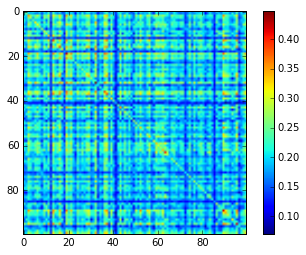

In [2]:
n_sets = 100
n_features_per_set = 10
d = 2
random_data = numpy.random.randn(n_sets, n_features_per_set, d)

K = numpy.empty((n_sets, n_sets))
for i in range(n_sets):
    for j in range(n_sets):
        K[i, j] = match_kernel(random_data[i], random_data[j], gamma=1.)

_ = pylab.imshow(K)
_ = pylab.colorbar()

Then, let us have a look at the properties of this kernel.

First, what do diagonal values look like?

In [3]:
print(numpy.diag(K))

[ 0.26319939  0.25557275  0.34880223  0.27897267  0.2425728   0.32138116
  0.30829059  0.26667541  0.27827061  0.29614519  0.2812251   0.33055188
  0.18966033  0.390325    0.25868565  0.29536446  0.3904765   0.30013072
  0.17719768  0.42393778  0.27943606  0.34121242  0.23052111  0.23849473
  0.2904036   0.24730858  0.26838492  0.25493557  0.31595353  0.3375677
  0.27124861  0.2411966   0.44829681  0.20637193  0.23189165  0.20572472
  0.38553731  0.38245295  0.25632411  0.31820572  0.24586116  0.18269334
  0.23626577  0.34797831  0.22840881  0.3020889   0.24639701  0.26601772
  0.2366602   0.26988115  0.27745034  0.24693458  0.32960683  0.24427402
  0.19623425  0.28127552  0.32558134  0.20544019  0.30591004  0.33472792
  0.29431877  0.27647061  0.34020695  0.40482471  0.28718483  0.19832217
  0.27746917  0.26659775  0.26623545  0.22637718  0.24800825  0.22537799
  0.19899378  0.22192896  0.27705451  0.21130262  0.28170595  0.23296115
  0.26777209  0.27127645  0.25140295  0.21944139  0.

This is something I am not very happy with: how can one say that $\mathcal{X}$ is more similar to itself than $\mathcal{Y}$ is to itself?

Another point that is bothering me is that $\mathcal{Y}$ can be more similar to $\mathcal{X}$ than $\mathcal{X}$ itself:

In [4]:
for i in range(n_sets):
    for j in range(n_sets):
        if K[i, j] > min(K[i, i], K[j, j]):
            print("(%d,%d) is one example of such a behaviour (Kij=%.2f, Kii=%.2f, Kjj=%.2f)" % (i, j, K[i, j], K[i, i], K[j, j]))

(0,95) is one example of such a behaviour (Kij=0.28, Kii=0.26, Kjj=0.42)
(2,14) is one example of such a behaviour (Kij=0.27, Kii=0.35, Kjj=0.26)
(2,35) is one example of such a behaviour (Kij=0.21, Kii=0.35, Kjj=0.21)
(2,54) is one example of such a behaviour (Kij=0.20, Kii=0.35, Kjj=0.20)
(2,57) is one example of such a behaviour (Kij=0.22, Kii=0.35, Kjj=0.21)
(2,70) is one example of such a behaviour (Kij=0.25, Kii=0.35, Kjj=0.25)
(2,89) is one example of such a behaviour (Kij=0.35, Kii=0.35, Kjj=0.42)
(2,94) is one example of such a behaviour (Kij=0.24, Kii=0.35, Kjj=0.22)
(3,16) is one example of such a behaviour (Kij=0.29, Kii=0.28, Kjj=0.39)
(3,19) is one example of such a behaviour (Kij=0.28, Kii=0.28, Kjj=0.42)
(3,32) is one example of such a behaviour (Kij=0.30, Kii=0.28, Kjj=0.45)
(3,36) is one example of such a behaviour (Kij=0.28, Kii=0.28, Kjj=0.39)
(3,89) is one example of such a behaviour (Kij=0.28, Kii=0.28, Kjj=0.42)
(4,13) is one example of such a behaviour (Kij=0.24

Finally, if we normalize the kernel, we get:

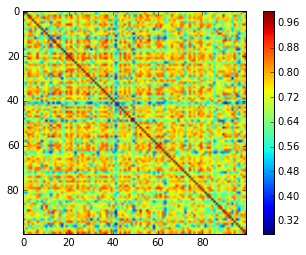

In [5]:
K_diag_sqrt = numpy.sqrt(numpy.diag(K))

K = K / K_diag_sqrt.reshape((-1, 1))
K = K / K_diag_sqrt.reshape((1, -1))

_ = pylab.imshow(K)
_ = pylab.colorbar()

In [6]:
print(numpy.diag(K))
for i in range(n_sets):
    for j in range(n_sets):
        if K[i, j] > min(K[i, i], K[j, j]):
            print("(%d,%d) is one example of such a behaviour (Kij=%.2f, Kii=%.2f, Kjj=%.2f)" % (i, j, K[i, j], K[i, i], K[j, j]))
        

[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]
